# FWL定理

[Amazon.co.jp: 計量経済学 New Liberal Arts Selection eBook : 西山慶彦, 新谷元嗣, 川口大司, 奥井亮: Kindleストア](https://www.amazon.co.jp/dp/B07YGPBF95)
のp152, p664-669に書いてあるらしい

## OLSのPartialling out解釈

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \varepsilon
$$

というモデルの$\beta_1$は

1. $y$を$x_1$に回帰する：$y = \beta_0 + \beta_1 x_1 + \beta_2 z_2 + \varepsilon$
2. $y$を$\tilde{x}_1$に回帰する（ここで$\tilde{x}_1$は$x_1$を$x_2$に回帰した残差）
3. $\tilde{y}$を$\tilde{x}_1$に回帰する（ここで$\tilde{y}$は$y$を$x_2$に回帰した残差）

の3つの方法のいずれかで推定することができる

### 数値例

In [1]:
import numpy as np

n = 1000
np.random.seed(0)
x0 = np.ones(shape=(n, ))
x2 = np.random.uniform(0, 1, size=n)
x1 = 3 * x2 + np.random.uniform(0, 1, size=n) + np.random.normal(0, 1, size=n)
X = np.array([ x0, x1, x2 ]).T
e = np.random.normal(0, 1, size=n)

beta = np.array([10, 5, 7])  # 真のbeta
y = X @ beta + e

In [2]:
np.corrcoef(X, rowvar=False)

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[       nan,        nan,        nan],
       [       nan, 1.        , 0.64601675],
       [       nan, 0.64601675, 1.        ]])

In [3]:
class OLS:
    def fit(self, X, y):
        self.beta_ = np.linalg.inv(X.T @ X) @ X.T @ y
        return self

    def predict(self, X):
        return X @ self.beta_

#### 1. $y$を$x_1$に回帰する

$y = \beta_0 + \beta_1 x_1 + \beta_2 z_2 + \varepsilon$

In [4]:
# 1. 𝑦 を 𝑥1 に回帰する
OLS().fit(X, y).beta_

array([9.98226817, 5.03640436, 6.80111723])

#### 2. $y$を$\tilde{x}_1$に回帰する

ここで$\tilde{x}_1$は$x_1$を$x_2$に回帰した残差


In [5]:
# 2. 𝑦 を 𝑥̃ 1 に回帰する
X_ = X[:, [0, 2]] # x0, x2だけのX
x1_res = x1 - OLS().fit(X_, x1).predict(X_)

# 切片を付けた場合
X_ = np.array([ x0, x1_res ]).T
OLS().fit(X_, y).beta_

array([23.29878836,  5.03640436])

In [6]:
# 切片を付けない場合
OLS().fit(x1_res.reshape(-1, 1), y).beta_

array([5.03640436])

#### 3. $\tilde{y}$を$\tilde{x}_1$に回帰する

ここで$\tilde{y}$は$y$を$x_2$に回帰した残差

In [7]:
# 3. 𝑦̃ を 𝑥̃ 1 に回帰する
X_ = X[:, [0, 2]] # x0, x2だけのX
y_res = y - OLS().fit(X_, y).predict(X_)

# 切片を付けない場合
OLS().fit(x1_res.reshape(-1, 1), y_res).beta_

array([5.03640436])

In [8]:
# 切片を付けた場合
X_ = np.array([ x0, x1_res ]).T
OLS().fit(X_, y_res).beta_

array([8.32667268e-17, 5.03640436e+00])

### partialling out

OLS推定では説明変数と残差の共分散はゼロになる。

$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_j x_j + \cdots + \beta_d x_d + \varepsilon
$$

というモデルがあったとき、説明変数$x_j$を他のすべての説明変数に回帰すると、その残差$\tilde{x}_j$は説明変数$x_j$の分散の情報を残す一方で他の説明変数とは無相関になる。

したがって$y$をこの残差$\tilde{x}_j$に回帰すると、その回帰係数$\beta_j$は$y$に対する$x_j$の影響のみを示す。

→他の変数の影響を排除（partialling out）できる

## FWL定理



https://www.fbc.keio.ac.jp/~tyabu/keiryo/fwl.pdf

## FWL定理の応用

### データの可視化

元のモデルに$d$次元の説明変数があったとしても、$\tilde{x}_j$と$y$の関係へと次元を削減することができるため、グラフに表示しやすい。

### 計算の高速化

[PyHDFE](https://pyhdfe.readthedocs.io/en/stable/index.html)パッケージのような高次元データの分析において活用されているらしい

### 統計的因果推論

> I am referring to the work on post-double selection by Belloni, Chernozhukov, Hansen (2013) and the follow up work on “double machine learning” by Chernozhukov, Chetverikov, Demirer, Duflo, Hansen, Newey, Robins (2018).

- [Belloni et al. (2014)](https://academic.oup.com/restud/article-abstract/81/2/608/1523757?login=false)のpost-double selection
- Chernozhukov et al. (2018)の[Double/debiased machine learning](https://academic.oup.com/ectj/article/21/1/C1/5056401?login=false)


## References

- http://www2.kobe-u.ac.jp/~kawabat/ch03j_wooldridge.pdf
- [Understanding the Frisch-Waugh-Lovell Theorem | by Matteo Courthoud | Towards Data Science](https://towardsdatascience.com/the-fwl-theorem-or-how-to-make-all-regressions-intuitive-59f801eb3299)

FWL
- Frisch, R., & Waugh, F. V. (1933). [Partial time regressions as compared with individual trends](https://www.jstor.org/stable/1907330). Econometrica: Journal of the Econometric Society, 387-401.
- Lovell, M. C. (1963). [Seasonal adjustment of economic time series and multiple regression analysis](https://www.tandfonline.com/doi/abs/10.1080/01621459.1963.10480682). Journal of the American Statistical Association, 58(304), 993-1010.


## （考察）再帰的なpartialling outで任意のパラメータを任意の次元で推定できないか？

→ できなかった

うまくいってAdditive modelとのつながりが見えれば面白かったんだが

In [9]:
import numpy as np

n = 1000
np.random.seed(0)
x0 = np.ones(shape=(n, ))
x2 = np.random.uniform(0, 1, size=n)
x3 = np.random.uniform(0, 1, size=n)
x1 = x2 + x3 + np.random.normal(0, 1, size=n)
X = np.array([ x0, x1, x2, x3 ]).T
e = np.random.normal(0, 1, size=n)

beta = np.array([10, 5, 7, 3])  # 真のbeta
y = X @ beta + e

In [11]:
class OLS:
    def fit(self, X, y):
        self.beta_ = np.linalg.inv(X.T @ X) @ X.T @ y
        return self

    def predict(self, X):
        return X @ self.beta_

#### 1. $y$を$x_1$に回帰する

$y = \beta_0 + \beta_1 x_1 + \beta_2 z_2 + \varepsilon$

In [12]:
# 1. 𝑦 を 𝑥1 に回帰する
OLS().fit(X, y).beta_

array([9.95538609, 5.03200117, 6.87766976, 3.05740035])

#### 2. $y$を$\tilde{x}_1$に回帰する

ここで$\tilde{x}_1$は$x_1$を残りの説明変数に回帰した残差

$$
\tilde{x}_1 = x_1 - (\hat{\beta}_0 + \hat{\beta}_2 x_2 + \hat{\beta}_3 x_3)
$$


In [41]:
# 2. 𝑦 を 𝑥̃ 1 に回帰する
X_ = X[:, [0, 2, 3]]
x1_res = x1 - OLS().fit(X_, x1).predict(X_)


# 切片を付けない場合
OLS().fit(x1_res.reshape(-1, 1), y).beta_

array([5.03200117])

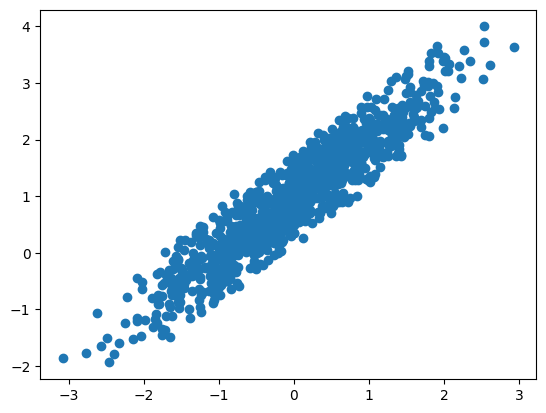

In [42]:
import matplotlib.pyplot as plt
plt.scatter(x1_res, x1)

In [44]:
from scipy.stats import pearsonr
pearsonr(x1_res, x1).statistic.round(3)

0.933

説明変数1つずつでpartialling outできないか？

1. $\tilde{x}_1 = x_1 - \hat{\beta}_0 x_0$
2. $\tilde{x}_1 = \tilde{x}_1 - \hat{\beta}_2 x_2$
3. $\tilde{x}_1 = \tilde{x}_1 - \hat{\beta}_3 x_3$


for all nuisance parameter indices $j \in J$

1. $\newcommand{\argmin}{\mathop{\arg\min}} \hat{\beta}_j = \argmin_{\beta_j} E[(y - \beta_j x_j)^2]$
2. $\tilde{x}_j = y - \hat{\beta}_j x_j$

In [58]:
# 2. 𝑦 を 𝑥̃ 1 に回帰する
x1_res = x1.copy()
nuisance_indices = [0, 2, 3]
for i in nuisance_indices:
    X_ = X[:, [i]]
    x1_res = x1_res - OLS().fit(X_, x1_res).predict(X_)
    print(f"corr(x1_res, x1): {pearsonr(x1_res, x1).statistic:.3f}")
    print(f"beta1           : {OLS().fit(x1_res.reshape(-1, 1), y).beta_[0]:.3f}")

OLS().fit(x1_res.reshape(-1, 1), y).beta_

corr(x1_res, x1): 1.000
beta1           : 5.750
corr(x1_res, x1): 0.998
beta1           : 3.435
corr(x1_res, x1): 0.998
beta1           : 2.925


array([2.92542108])

In [61]:
# 2. 𝑦 を 𝑥̃ 1 に回帰する
x1_res = x1.copy()
nuisance_indices = [0, 2, 3]
for i in nuisance_indices[::-1]:
    X_ = X[:, [i]]
    x1_res = x1_res - OLS().fit(X_, x1_res).predict(X_)
    print(f"corr(x1_res, x1): {pearsonr(x1_res, x1).statistic:.3f}")
    print(f"beta1           : {OLS().fit(x1_res.reshape(-1, 1), y).beta_[0]:.3f}")

OLS().fit(x1_res.reshape(-1, 1), y).beta_

corr(x1_res, x1): 0.887
beta1           : 7.193
corr(x1_res, x1): 0.876
beta1           : 2.998
corr(x1_res, x1): 0.876
beta1           : 4.613


array([4.61310126])